# **IMDB - Web Scraping**

### The first step is to import the necessary modules

In [15]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import time
import random

### I define a function that returns a BeautifulSoup object with the parsed HTML code of the target url

In [2]:
def get_movies_page(release_year):
    """
    Function to download the IMDB web page using `requests` and check the status code to validate
    if the call was successful.
    """

    # URL to be scraped
    movies_url = f"https://www.imdb.com/search/title/?title_type=feature&release_date={release_year}-01-01,{release_year}-12-31"


    # Set headers to mimic a legitimate request
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
    }

    # Access the webpage using `requests`
    response = requests.get(movies_url,headers=headers)

    # Check if the request was successful
    if response.status_code != 200:
        raise Exception('Failed to load page {}'.format(movies_url))
    else:
        print(f'Webpage for release year {release_year}: request status {response.status_code}')

    # Parse the `response' text using BeautifulSoup
    movies_doc = BeautifulSoup(response.text, 'html.parser')

    return movies_doc

### I iterate through the releasing years to get the movies' details (title, release year, IMDB rating and votes)

In [9]:
# I define the list of release years to iterate
years_url = range(2010,2024)

# I define the necessary lists to store the scrapped data
request_count = 0
titles = []
movie_release_year = []
votes = []
rating = []


# I iterate through each year to extract the data
for year in years_url:

  # First I check if the number of requests has reached the maximum limit
  request_count += 1
  if request_count > 70:
      print("Reached maximum request limit.")
      break

  # I get the BeautifulSoup object for the corresponding year of release
  movie_soup = get_movies_page(year)

  # I pause the loop between 8 and 15 seconds
  time.sleep(random.randint(8, 15))

  # I get the movie's title and year of release
  for movie in movie_soup.select('.ipc-title__text'):
        title = movie.text.strip()
        if title in ['Advanced search','Recently viewed']:
          next
        else:
          title = movie.text.strip()[3:]
          titles.append(title)
          movie_release_year.append(year)

  # I get the movie's vote count and the imdb rating
  for j in range(len(movie_soup.select('.ipc-rating-star--imdb'))):
    vote = movie_soup.select('.ipc-rating-star--voteCount')[j].text.strip()
    vote = vote.replace('(', '').replace(')', '')
    votes.append(vote)

    rate = movie_soup.select('.ipc-rating-star--imdb')[j].text.strip()[:3]
    rating.append(float(rate))


Webpage for release year 2010: request status 200
Webpage for release year 2011: request status 200
Webpage for release year 2012: request status 200
Webpage for release year 2013: request status 200
Webpage for release year 2014: request status 200
Webpage for release year 2015: request status 200
Webpage for release year 2016: request status 200
Webpage for release year 2017: request status 200
Webpage for release year 2018: request status 200
Webpage for release year 2019: request status 200
Webpage for release year 2020: request status 200
Webpage for release year 2021: request status 200
Webpage for release year 2022: request status 200
Webpage for release year 2023: request status 200


In [10]:
# I check the lenght of the lists before building a dataframe
print(len(titles))
print(len(votes))
print(len(rating))
print(len(movie_release_year))

700
700
700
700


### I create a dataframe with the scrapped information

In [11]:
# I create a dictionary to store the movies information
movies_dict = {
    'title': titles,
    'release_year': movie_release_year,
    'imdb_rating': rating,
    'votes': votes
}

# I create a dataframe with the movies' information
df_movies = pd.DataFrame(movies_dict)

# I save the dataframe to a csv file
df_movies.to_csv('Scrapped Movies Data.csv', index=False)

df_movies

,title,release_year,imdb_rating,votes
0,Inception,2010,8.8,2.5M
1,Kick-Ass,2010,7.6,591K
2,Unthinkable,2010,7.0,93K
3,The Last Airbender,2010,4.0,174K
4,Incendies,2010,8.3,198K
...,...,...,...,...
695,You'll Never Find Me,2023,6.0,1K
696,Boy Kills World,2023,6.3,400
697,May December,2023,6.9,50K
698,Taylor Swift: The Eras Tour,2023,8.1,19K


### Finally, I plot a histogram to see the IMDB Rating distribution

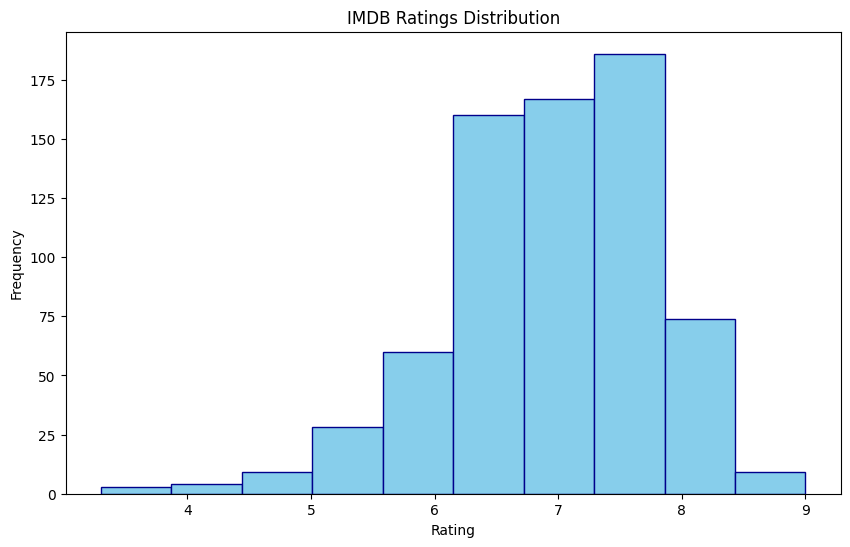

In [17]:
# Make a histogram of the IMDB Ratings to see the distribution of the rates

plt.figure(figsize=(10,6))

plt.hist(df_movies['imdb_rating'], bins=10, color='skyblue', edgecolor='darkblue')

# Add labels and title
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('IMDB Ratings Distribution')

# Finally, I show the plot
plt.show()